# Exploration of Prosper Loan Data
### by Shazia Zahid

## Preliminary Wrangling


Prosper is America’s first marketplace lending platform, with over $9 billion in funded loans. This data set contains 113,937 loans with 81 variables on each loan,  including loan amount, borrower rate (or interest rate), current loan  status, borrower income, borrower employment status, borrower credit  history, and the latest payment information.

This notebook will document my efforts to explore and clean an interesting dataset from the Prosper peer-to-peer lending platform, and to then make some visualizations to answer few questions. 


The original data can be found here: 

https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv. 

A variable dictionary concisely explaining the data can be found here: 

https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing.

There are many questions one could ask on this data, but in this exercise I will focus on one question specifically: Is there a relationship between varaibles. Prosper loans pay pretty hefty interest rates to their creditors. There is thus a significant financial incentive to accurately finding relatioships in varaibles. 

    1. What factors affect a loan’s outcome status?
    2. What affects the borrower interest rate?
    3. Are there differences between loans Status depending on how large the original loan amount was?
 

I will explore it visually and programmatically, clean the data, explore the data with some visualisations and try to find the relationships/patterns in data.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Initials of Samuel Norman Seaborn so using sns here insted of sb
import seaborn as sns

%matplotlib inline

#### Loading in dataset and describing its properties:

In [3]:
# Reading given csv file into pandas dataframe.
df_complete = pd.read_csv('prosperLoanData.csv')

In [4]:
# Looking at the shape what I have got here:
df_complete.shape

(113937, 81)

In [5]:
# What this dataset has in it.
df_complete.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# Checking for data types and guage for missing values
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
# Checking for duplicate rows in complete dataset.
df_complete.duplicated().sum()

0

In [8]:
# Checking for duplicate loans based on ListingKey variable because i can see duplicate listingkey visually.

# ListingKey: Unique key for each listing, same value as the 'key' used in the listing object in the API.

# I want to compare few duplicate listings to check where is the difference in duplicate listings

# I want to see all coulumns in dataframe: 
pd.set_option('display.max_columns', None)

# Making a series of all Listings
ids = df_complete["ListingKey"]

# Checking for listing duplicates
df_complete[ids.isin(ids[ids.duplicated()])].sort_values("ListingKey").head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
32680,00223594917038064A7C947,998257,2013-11-15 16:58:37.167000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,5.0,1,NY,Other,Employed,69.0,False,False,NaN,2013-11-04 15:15:31,660.0,679.0,2003-09-07 00:00:00,18.0,17.0,28.0,14,677.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,15512.0,0.86,2212.0,28.0,0.96,1.0,0.42,"$25,000-49,999",True,2773.333333,A352369967047316033A599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,118852,5000,2013-11-26 00:00:00,Q4 2013,ED2F3696548507863FAC18D,185.31,553.2177,311.63,241.5877,-12.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32681,00223594917038064A7C947,998257,2013-11-15 16:58:37.167000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,6.0,1,NY,Other,Employed,69.0,False,False,NaN,2013-11-04 15:15:31,660.0,679.0,2003-09-07 00:00:00,18.0,17.0,28.0,14,677.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,15512.0,0.86,2212.0,28.0,0.96,1.0,0.42,"$25,000-49,999",True,2773.333333,A352369967047316033A599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,118852,5000,2013-11-26 00:00:00,Q4 2013,ED2F3696548507863FAC18D,185.31,553.2177,311.63,241.5877,-12.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32964,00473590513960687DD308F,941296,2013-10-07 15:47:36.023000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,4.0,1,TX,Nurse (RN),Employed,218.0,True,False,NaN,2013-10-07 15:47:39,660.0,679.0,1990-06-04 00:00:00,21.0,20.0,53.0,13,858.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,30682.0,0.65,11343.0,51.0,0.86,0.0,0.31,"$100,000+",True,10000.000000,1C5336968140286844BD165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,106820,25000,2013-10-21 00:00:00,Q4 2013,FCEA3695208015694B2A2B6,659.57,2746.0084,1311.77,1434.2384,-73.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
17274,00473590513960687DD308F,941296,2013-10-07 15:47:36.023000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,6.0,1,TX,Nurse (RN),Employed,218.0,True,False,NaN,2013-10-07 15:47:39,660.0,679.0,1990-06-04 00:00:00,21.0,20.0,53.0,13,858.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,30682.0,0.65,11343.0,51.0,0.86,0.0,0.31,"$100,000+",True,10000.000000,1C5336968140286844BD165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,106820,25000,2013-10-21 00:00:00,Q4 2013,FCEA3695208015694B2A2B6,659.57,2746.0084,1311.77,1434.2384,-73.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7478,0098360461900952056DB93,1190614,2014-03-02 14:21:39.583000000,NaN,36,Current,NaN,0.29660,0.2574,0.2474,0.22530,0.1325,0.09280,2.0,E,2.0,1,VA,Professional,E


After reading the detail here I decided to delete duplicate rows with respect to ListingKey, In fact ProsperScore is the only variable that is making these rows unique:

https://www.prosper.com/plp/general-prosper_score/

#### ProsperScore: 
A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.
Applicable for loans originated after July 2009.



Example:
#### ListingKey: 00223594917038064A7C947	
ProsperScore is 5.0 in first Observation(Row)
ProsperScore is 6.0 in second Observation(Row)

#### ListingKey: 00473590513960687DD308F	
ProsperScore is 4.0 in first Observation(Row)
ProsperScore is 6.0 in second Observation(Row)

### Cleaning Dataset (df_complete)
#### Plan (Define, Code, Test)

In [9]:
# Define-1
# Want to delete rows with duplicate ListingKey
# Making a series of all Listings
ids = df_complete["ListingKey"]

# Checking for listing duplicates
df_complete[ids.isin(ids[ids.duplicated()])].sort_values("ListingKey").count()

ListingKey                     1698
ListingNumber                  1698
ListingCreationDate            1698
CreditGrade                       0
Term                           1698
                               ... 
PercentFunded                  1698
Recommendations                1698
InvestmentFromFriendsCount     1698
InvestmentFromFriendsAmount    1698
Investors                      1698
Length: 81, dtype: int64

In [10]:
# Code-1
df_complete = df_complete.drop_duplicates(subset='ListingKey')

In [11]:
# Test-1
# Checking for ListingKey duplicates again

df_complete[ids.isin(ids[ids.duplicated()])].sort_values("ListingKey").count()

/home/shazia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


ListingKey                     827
ListingNumber                  827
ListingCreationDate            827
CreditGrade                      0
Term                           827
                              ... 
PercentFunded                  827
Recommendations                827
InvestmentFromFriendsCount     827
InvestmentFromFriendsAmount    827
Investors                      827
Length: 81, dtype: int64

In [12]:
# I am interested only these columns, making a list

cols = ['ListingKey','LoanStatus','Term','BorrowerAPR','BorrowerRate','EmploymentStatus','StatedMonthlyIncome','LoanOriginalAmount']

# making a new dataframe with columns I want to explore.
df = df_complete[cols]

In [13]:
# checking my selected subset of dataframe
df.head()

,ListingKey,LoanStatus,Term,BorrowerAPR,BorrowerRate,EmploymentStatus,StatedMonthlyIncome,LoanOriginalAmount
0,1021339766868145413AB3B,Completed,36,0.16516,0.1580,Self-employed,3083.333333,9425
1,10273602499503308B223C1,Current,36,0.12016,0.0920,Employed,6125.000000,10000
2,0EE9337825851032864889A,Completed,36,0.28269,0.2750,Not available,2083.333333,3001
3,0EF5356002482715299901A,Current,36,0.12528,0.0974,Employed,2875.000000,10000
4,0F023589499656230C5E3E2,Current,36,0.24614,0.2085,Employed,9583.333333,15000


In [14]:
# Checking shape of data
df.shape

(113066, 8)

In [15]:
# Checking for missing values and datatypes in my dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           113066 non-null  object 
 1   LoanStatus           113066 non-null  object 
 2   Term                 113066 non-null  int64  
 3   BorrowerAPR          113041 non-null  float64
 4   BorrowerRate         113066 non-null  float64
 5   EmploymentStatus     110811 non-null  object 
 6   StatedMonthlyIncome  113066 non-null  float64
 7   LoanOriginalAmount   113066 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 7.8+ MB


In [16]:
# Checking for duplicate rows
df.duplicated().sum()

0

### Observations for Cleaning

1. Missing Values can be seen Income and few coulmns.
2. No need of redundant ListingKey and other unique identifier columns.
3. Data types should be more appropriate.
4. Variables have a wide variety of ranges, may be there are outliers. 
5. My main interest is in Loan's outcome. List of possible outcomes need to be examined carefully to think a way to shorten it into only two categories.(Tidiness issue)

### Cleaning
#### Define, Code, Test

In [17]:
# Define-2
# Checking for Missing values in BorrowerAPR
# imputing it with some average value will not produce fair results in my opinion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           113066 non-null  object 
 1   LoanStatus           113066 non-null  object 
 2   Term                 113066 non-null  int64  
 3   BorrowerAPR          113041 non-null  float64
 4   BorrowerRate         113066 non-null  float64
 5   EmploymentStatus     110811 non-null  object 
 6   StatedMonthlyIncome  113066 non-null  float64
 7   LoanOriginalAmount   113066 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 7.8+ MB


In [18]:
# Code-2
# Removing rows with missing borrower APR information

df = df[~df.BorrowerAPR.isna()]

In [19]:
# Test-2
# Checking for Missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113041 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           113041 non-null  object 
 1   LoanStatus           113041 non-null  object 
 2   Term                 113041 non-null  int64  
 3   BorrowerAPR          113041 non-null  float64
 4   BorrowerRate         113041 non-null  float64
 5   EmploymentStatus     110811 non-null  object 
 6   StatedMonthlyIncome  113041 non-null  float64
 7   LoanOriginalAmount   113041 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 7.8+ MB


In [20]:
# Define-3
# EmploymentStatus has nan values.
#I can fill it with "Unknown" string to show it a category while plotting

In [21]:
# Code-3
# Filling nan with Unknown in EmploymentStatus column

df['EmploymentStatus'] = df['EmploymentStatus'].fillna("Unknown")

In [22]:
# Test-3
# Checking for null values now

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113041 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           113041 non-null  object 
 1   LoanStatus           113041 non-null  object 
 2   Term                 113041 non-null  int64  
 3   BorrowerAPR          113041 non-null  float64
 4   BorrowerRate         113041 non-null  float64
 5   EmploymentStatus     113041 non-null  object 
 6   StatedMonthlyIncome  113041 non-null  float64
 7   LoanOriginalAmount   113041 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 7.8+ MB


In [23]:
# Define-5
# I kept ListingKey as unique identifier while exploring dataframe but I think we do not need it anymore

In [24]:
# Code-5

df.drop('ListingKey', axis=1, inplace=True)

In [25]:
# Test-5
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113041 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   LoanStatus           113041 non-null  object 
 1   Term                 113041 non-null  int64  
 2   BorrowerAPR          113041 non-null  float64
 3   BorrowerRate         113041 non-null  float64
 4   EmploymentStatus     113041 non-null  object 
 5   StatedMonthlyIncome  113041 non-null  float64
 6   LoanOriginalAmount   113041 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 6.9+ MB


In [26]:
# Lets check some summery statistics for my subset:
df.describe()

,Term,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,LoanOriginalAmount
count,113041.000000,113041.000000,113041.000000,1.130410e+05,113041.000000
mean,40.801231,0.218980,0.192968,5.604058e+03,8315.766916
std,10.422426,0.080483,0.074907,7.495438e+03,6237.150778
min,12.000000,0.006530,0.000000,0.000000e+00,1000.000000
25%,36.000000,0.156290,0.134000,3.198167e+03,4000.000000
50%,36.000000,0.209840,0.184000,4.666667e+03,6300.000000
75%,36.000000,0.283860,0.250600,6.812500e+03,12000.000000
max,60.000000,0.512290,0.497500,1.750003e+06,35000.000000


In [27]:
# Checking for missing values again.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113041 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   LoanStatus           113041 non-null  object 
 1   Term                 113041 non-null  int64  
 2   BorrowerAPR          113041 non-null  float64
 3   BorrowerRate         113041 non-null  float64
 4   EmploymentStatus     113041 non-null  object 
 5   StatedMonthlyIncome  113041 non-null  float64
 6   LoanOriginalAmount   113041 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 6.9+ MB


### What is the structure of your dataset?


The complete dataset contains 113,937 loans (observations or rows) with 81 features (variables or columns).

Each variable is giving important information about dataset. I found that more than three variable are being used to uniquely identifying observations and loans. I am not converting the string variables into categories because they do not have fixed sets of values and for Loan outcome status, I need to re-classify it with Completed/Defaulted only.


### What is/are the main feature(s) of interest in your dataset?

My main question is:

    1. What factors affect a loan’s outcome status?

and I will also try to find:
    
    2. What affects the borrower interest rate?
    3. Are there differences between loans depending on how large the original loan amount was?

Complete Dataset has a lots of features. Exploring, cleaning and finding relationships for every feature in dataset is not possible in this timeframe for me at least.

I am interested in exploring few coulumns to finds answers to the questions given above.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I am expecting that Loans of lower amounts and higher Interest rate are being paid in time and loans of higher amounts with low interest rate are being defaulted. I am not sure yet. This is just my hypotheses you can say.

Here is the list of features I will explore to find the answers:

1. LoanStatus (main feature of interest)

2. Term

3. EmploymentStatus

4. BorrowerAPR

5. BorrowerRate

6. StatedMonthlyIncome

7. LoanOriginalAmount

#### Description of each Feature:

1. LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

2. Term: The length of the loan expressed in months.

3. EmploymentStatus : The employment status of the borrower at the time they posted the listing.

4. BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.

5. BorrowerRate: The Borrower's interest rate for this loan.

6. StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.

7. LoanOriginalAmount: The origination amount of the loan.   

## Univariate Exploration

Let's investigate the data for our real question: default. What are the features of defaulted loans? But Loan Statuses we do have? Can we see distribution or counts of each status?

In [28]:
# counting values for different Loan Statuses
df.LoanStatus.value_counts()

Current                   55730
Completed                 38036
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [29]:
# Reloading plt because getting "str" not callable error"
from importlib import reload
plt=reload(plt)

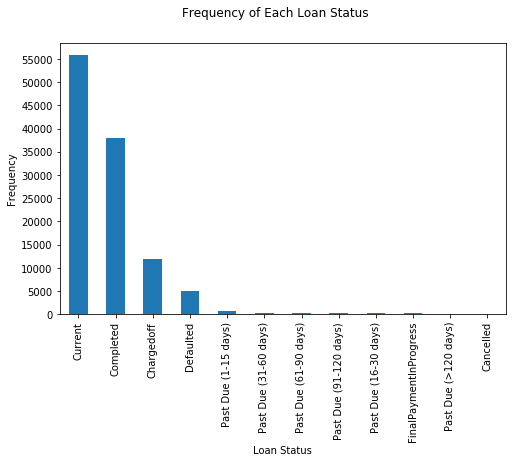

In [30]:
# Ploting Loan Status to see frequency of each Status in dataframe

data = df.LoanStatus.value_counts()

fig = plt.figure(figsize=(8,5)) # Creates a new figure

fig.suptitle('Frequency of Each Loan Status', fontsize=12)
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.yticks(np.arange(min(data)-5, max(data)+1, 5000))
data.plot(kind = 'bar');

We have many statuses of Loans here. It is tough to decide that what distinguishes completed loans from defaulted loans. Because there is no way to tell whether "current" loans will eventually default or completed, we cannot use them for our analysis. Nearly half of the dataset is not useful to us, as the loans are still outstanding. 

Since we want to have a conservative approach in estimates but still want to retain data, let's assume all the"Cancelled", "Past due" and "chargedoff" loans are defaulted and FinalPaymentInProgress are completed.

Thus we'll be left with three categories only: "Current" ,"Completed" and "Defaulted". 


In [31]:
# in first step adding a new column 'LoanStatusCat'
# then using lambda function with if/else to populate it with three categories

#df['new column name'] = df['column name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')

df['LoanStatusCat'] = df['LoanStatus'].apply(lambda x: x if (x == 'Current' or x =='Completed') else ('Completed' if x== 'FinalPaymentInProgress' else 'Defaulted'))

In [32]:
# Checking what i have got
df.LoanStatusCat.unique()

array(['Completed', 'Current', 'Defaulted'], dtype=object)

In [33]:
# Comparing two columns just to make sure my "if" worked as i wanted it.
df[['LoanStatusCat','LoanStatus']].sample(6)

,LoanStatusCat,LoanStatus
89219,Current,Current
70180,Completed,Completed
23770,Defaulted,Defaulted
45,Current,Current
105586,Current,Current
84489,Completed,Completed


In [34]:
# Deleting LoanStatus column as it wont be used anymore
df.drop('LoanStatus', axis=1, inplace=True)

In [35]:
# Removing rows (observations) with current loans from dataframe
df_clean = df.query('LoanStatusCat != "Current"')

In [36]:
# What is the ratio of Defaulted loans?

df_clean.LoanStatusCat.value_counts()/df_clean.LoanStatusCat.count()

Completed    0.667219
Defaulted    0.332781
Name: LoanStatusCat, dtype: float64

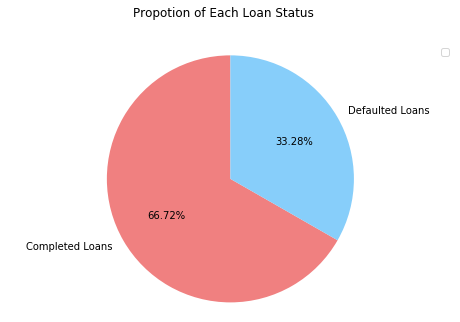

In [37]:
# Making pie chart on complete and defaulted loans.
# figure out data to plot in graph

labels = ['Completed Loans', 'Defaulted Loans']
sizes = df_clean.LoanStatusCat.value_counts()
colors = ['lightcoral', 'lightskyblue']

fig = plt.figure(figsize=(8,5)) # Creates a new figure

fig.suptitle('Propotion of Each Loan Status', fontsize=12)
plt.legend(labels)

# Plotting it
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)

plt.axis('equal');

Wow! I see a huge slice of defaulters here. May be Prosper need to make changes in their loan recovery system. Since slice of Defaulted Loans is quite large we can explore other features that might help in predicting if a Loan would be defaulted in future.

In [38]:
# Second variable to look at is Term
df_clean.Term.unique()

array([36, 60, 12])

In [39]:
# Exploring the Term variable in clean dataframe

term_data = df_clean.Term.value_counts()

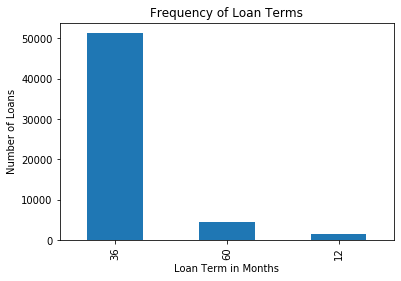

In [40]:
# Plotting discrete variable Term.

term_data.plot(kind = 'bar', figsize = (6,4))
plt.xlabel('Loan Term in Months', fontsize=10)
plt.ylabel('Number of Loans', fontsize=10)
# looking better withoyt yticks
#plt.yticks(index , label, fontsize=5, rotation=30)
plt.title('Frequency of Loan Terms');

Looks like most of the loans were for Three years i.e 36 months. One year (12 months) loans are least popular.

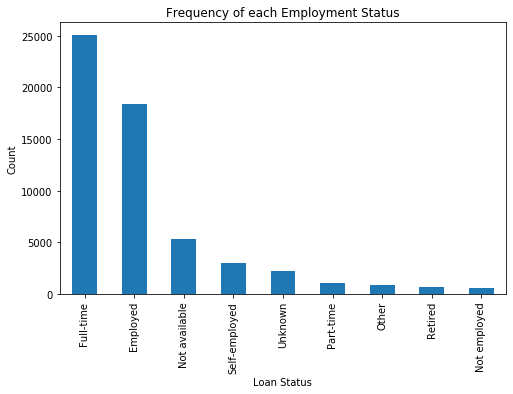

In [41]:
# My third categorical variable is EmploymentStatus

fig = plt.figure(figsize=(8,5)) # Creates a new figure
data1 = (df_clean.EmploymentStatus).value_counts()
plt.title('Frequency of each Employment Status', fontsize=12)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.yticks(np.arange(0, max(data1)+1, 5000))


data1.plot(kind = 'bar');

In [42]:
# What is the percenage of borrowers who declared them as Not employed:
df_clean.query('EmploymentStatus == "Not employed"').EmploymentStatus.count()/df_clean.EmploymentStatus.count()*100

1.0242361850255624

Most of the borrowers are working full time. Only 1 percent borrowers declared themselves as not employed.

Now exploring Borrower's Annual percentage Rate
Since it is a continous variable, I will make a histogram  for this variable, on cleaned dataframe.

In [43]:
# Reloading plt because getting "str" not callable error"
from importlib import reload
plt=reload(plt)

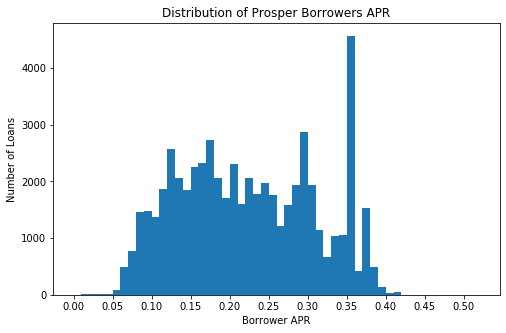

In [44]:
# Plotting hostogram for BorrowerAPR

bins = np.arange(0, df_clean.BorrowerAPR.max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.title('Distribution of Prosper Borrowers APR', fontsize=12)

plt.xlabel('Borrower APR')
plt.ylabel('Number of Loans')
plt.xticks(np.arange(0, max(df_clean.BorrowerAPR), 0.05))

plt.hist(data = df_clean, x = 'BorrowerAPR', bins = bins);

The distribution of APR is very interesting. It does not looks normal or even unimodal. One thing is quite evident that o.36 is the most frequent APR in whole dataframe.

A small peak centered at 0.1, a large peak centered at 0.2. There is also a fairly large peak centered 0.3. Additionally,  The sharpest peak is at 0.36. Only very few loans have APR greater than 0.43.

Cecking the distribution of BorrowerRate now. I am expecting to have ut almost same shape as BorrwerAPR

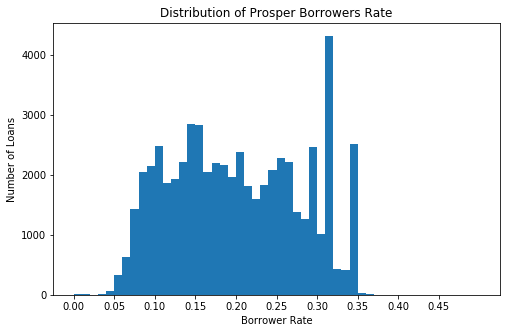

In [45]:
# Checking the distribution of BorrowerRate 
# Plotting

bins = np.arange(0, df_clean.BorrowerRate.max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.title('Distribution of Prosper Borrowers Rate', fontsize=12)
plt.hist(data = df_clean, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Rate')
plt.ylabel('Number of Loans')
plt.xticks(np.arange(0, max(df_clean.BorrowerRate), 0.05));

The distribution of Rate is multimodal as expected from distribution of APR. Sharpest peak can be seen at 0.32 this time.

A small peak centered at 0.1, a large peak centered at 0.15. There is also a fairly large peak centered 0.31 Additionally, there are two very sharp peaks between 0.30 and 0.35.
 
Average Borrowere Rate is 20% but there are peers who are paying only 13% and 49% interest rate as well.That is a big spread with standard deviation of 0.08.

In [46]:
df_clean.BorrowerRate.describe()

count    57311.000000
mean         0.201686
std          0.080939
min          0.000000
25%          0.136400
50%          0.198000
75%          0.269900
max          0.497500
Name: BorrowerRate, dtype: float64

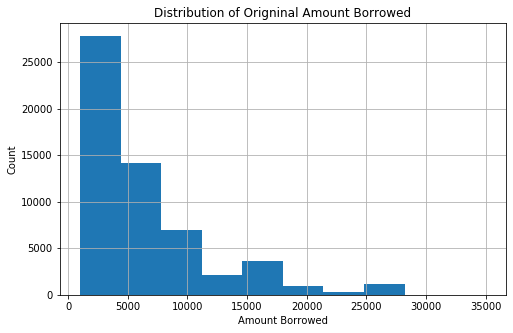

In [47]:
# Exploring LoanOriginalAmount

fig = plt.figure(figsize=(8,5)) # Creates a new figure
data2 = df_clean.LoanOriginalAmount

plt.title('Distribution of Origninal Amount Borrowed', fontsize=12)
plt.xlabel("Amount Borrowed")
plt.ylabel("Count")
plt.yticks(np.arange(0, max(data2)+1, 5000))
data2.hist();

In [48]:
# Checking the mean of  Original Amount.
df_clean.LoanOriginalAmount.mean()

6340.867163371779

Distribution of Original Amount of Loan is right skewed. Most of the peers borrowed less than ten thousands  but some peers borrowed much larger amounts and made the distributon right skewed. Average amount borrowed stands at $6341.

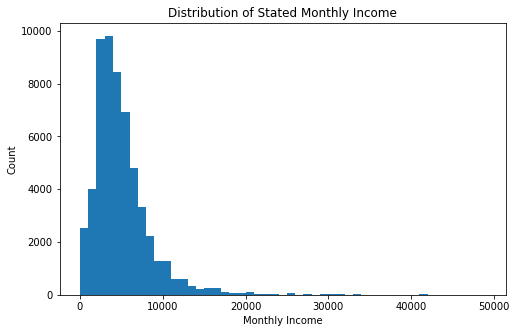

In [49]:
# Now exploring StatedMonthlyIncome
#Distribution of stated monthly income

bins = np.arange(0, 50000, 1000)

fig = plt.figure(figsize=(8,5)) # Creates a new figure
data2 = df_clean.LoanOriginalAmount

plt.title('Distribution of Stated Monthly Income', fontsize=12)
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.yticks(np.arange(0, max(df_clean.StatedMonthlyIncome), 2000))

plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins=bins);

StatedMonthlyIncome is highly right skewed. May be there are outliers. Some peers with very high monthly incomes are borrowing.

It is clear that there are outliers. We can try to do something with outliers in later cells.

Outlier: A data point that is distinctly separate from the rest of the data. One definition of outlier is any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile. Outliers can bee seen in box plots as well.

Lets plot it on log scale and then check summery statistics for find out what could be done.

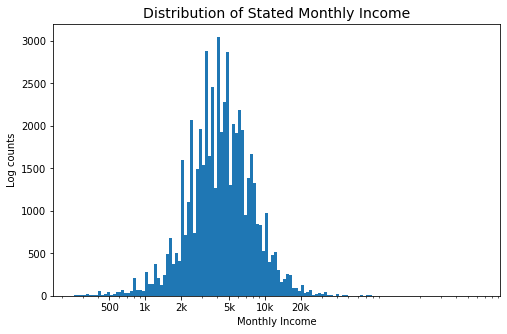

In [50]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_clean['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.title('Distribution of Stated Monthly Income', fontsize=14)
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Monthly Income')
plt.ylabel('Log counts')
plt.show()

Whenplotted on log scale distribution turns out to be multimodel with very sharp peeks. Most of the stated monthly incomes are within 1t housand to 20 thousand dollars.

In [51]:
# for monthly income look at summery statistics to understand outliers
df_clean.StatedMonthlyIncome.describe()

count     57311.000000
mean       5067.847180
std        5643.923782
min           0.000000
25%        2833.333333
50%        4166.666667
75%        6250.000000
max      618547.833333
Name: StatedMonthlyIncome, dtype: float64

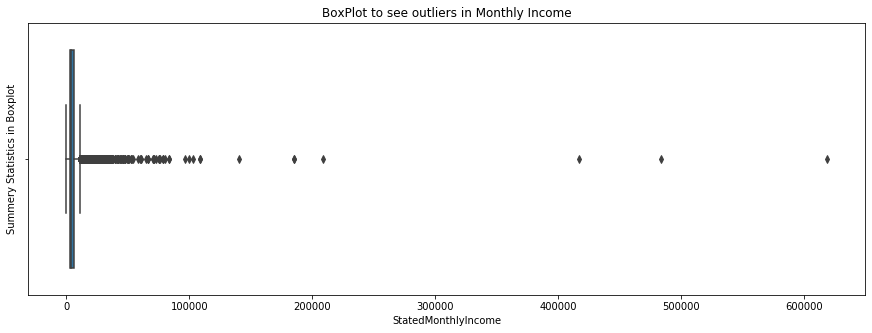

In [52]:
# Box plot to check outliers agian


fig = plt.figure(figsize=(15,5)) # Creates a new figure

plt.title('BoxPlot to see outliers in Monthly Income', fontsize=12)
plt.xlabel("Stated Monthly Income")
plt.ylabel("Summery Statistics in Boxplot")

plt.yticks(np.arange(1000, max(df_clean.StatedMonthlyIncome), 5000))

sns.boxplot(x = df_clean['StatedMonthlyIncome']);

It has way too many outliers. Removing all the outliers will make dataset quite small. I am removing just the observations with income greater than 30000.

In [53]:
# Getting percentage of peers who stated monthly income greater than 30000
((df_clean.StatedMonthlyIncome > 30000).sum())/(df_clean.shape[0])* 100

0.26347472561986357

In [54]:
# Keeping rows with stated monthly income less than 30000 considering tothers outliers
df_clean = df_clean[df_clean.StatedMonthlyIncome <= 30000]

In [55]:
# Checking above code, should return zeros
df_clean.query('StatedMonthlyIncome > 30000').count()

Term                   0
BorrowerAPR            0
BorrowerRate           0
EmploymentStatus       0
StatedMonthlyIncome    0
LoanOriginalAmount     0
LoanStatusCat          0
dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

My main variable of interest is "LoanStatus" which tells us either the loan was paid or defaulted. 

Since it is a categorical variable it has no such distribution like continous varaibles.But I has few status categories that i plotted in a bar chart. 

I am interested in classifying LoanStatus in defaulted and completed only. So I re-categorize it into three classes only. Completed(paid off), Defaulted and Current.

For "BorrowerAPR" and "BorrowerRate" i found multimodal distributions.
 

EmploymentStatus, Term and are categorical variables as well.

"StatedMonthlyIncome"  and "LoanOriginalAmount" both have right skewed distributions with some outliers as well.
For StatedMonthlyIncome log Transformation was used to have a close look at distribution and I found out it as a multimodel distribution with sharp peaks. I decided to removed some extreme outliers only. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
I classified Loan Stattus into three categories and removed the observations with current category altogether.

For "BorrowerAPR" and "BorrowerRate" i found multimodal distributions. SInce they are not much skewed in any direction I think having a multimodal distribtion is fine.

For "StatedMonthlyIncome" Distribution was too much right skewed. It had way too many outliers. Removed some of the outliers but not all.

## Bivariate Exploration

Here I am going to explore two features together to see their relationship and correlation and to figure out any patterns.

#### Term vs Loan Status(Completed,Defaulted)

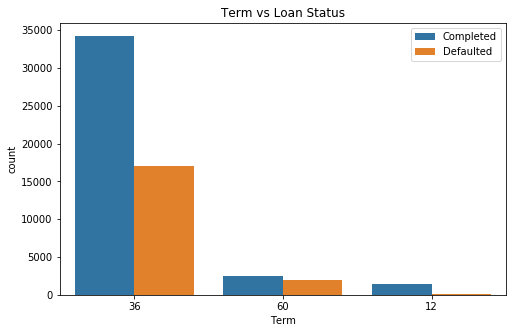

In [56]:
# Making a Stacked plot to see Term vs LoanStatusCat both are categorical variables

cat1_order = df_clean.Term.unique()
cat2_order = df_clean.LoanStatusCat.unique()

plt.figure(figsize = (8,5))
plt.title('Term vs Loan Status')
plt.xlabel('Terms')
plt.ylabel('Counts')
# clustered bar chart, absolute counts

sns.countplot(data = df_clean, x = 'Term', hue = 'LoanStatusCat', order = cat1_order, hue_order = cat2_order)
plt.legend();


It can be seen clearly that Loans borrowed for 60 months were defaulted more that half percent of time. Loans taken for 12 months have the highest ratio of pay back. May be Prosper can emphasize more on 12 moths loans.

#### Distribution of Loan Amount with respect to Loan Status(Completed,Defaulted)

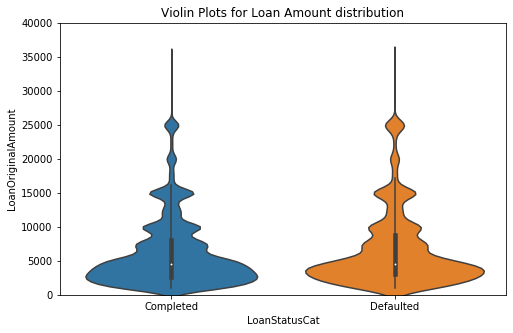

In [57]:
# Making a violin plot to see distribution of two variables Loan Status and Amount of Loan
# Loan Status is Qualitative and Amount is Quantitave

fig = plt.figure(figsize = (8,5))
plt.title('Violin Plots for Loan Amount distribution')

#ax1 = fig.add_subplot(221)
sns.violinplot(data=df_clean, x="LoanStatusCat", y="LoanOriginalAmount").set_ylim([0,40000]);

I am unable to see any major differece here. It looks like Orignal amount of loan does not have an impact on loan status.

The distribution of the loan amount seems to be consistent between both classes.

####  Employment Status vs Loan Status(Completed,Defaulted)

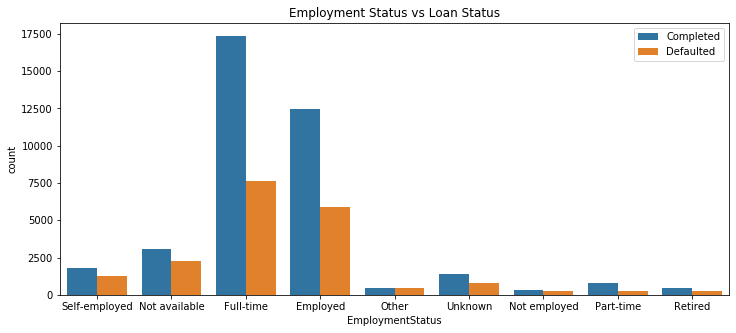

In [58]:
# Making a Stacked plot to see Term vs LoanStatusCat both are categorical variables

cat1_order = df_clean.EmploymentStatus.unique()
cat2_order = df_clean.LoanStatusCat.unique()

plt.figure(figsize = (12,5))
plt.title('Employment Status vs Loan Status')
plt.xlabel('Employment Status')
plt.ylabel('Counts')
# clustered bar chart, absolute counts

sns.countplot(data = df_clean, x = 'EmploymentStatus', hue = 'LoanStatusCat', order = cat1_order, hue_order = cat2_order)
plt.legend();

####  Employment Status vs Term

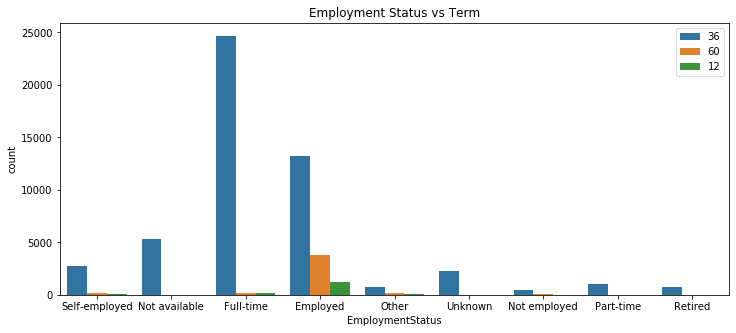

In [59]:
# Making a Stacked plot to see Term vs LoanStatusCat both are categorical variables

cat1_order = df_clean.EmploymentStatus.unique()
cat2_order = df_clean.Term.unique()

plt.figure(figsize = (12,5))
plt.title('Employment Status vs Term')
plt.xlabel('Employment Status')
plt.ylabel('Counts')
# clustered bar chart, absolute counts

sns.countplot(data = df_clean, x = 'EmploymentStatus', hue = 'Term', order = cat1_order, hue_order = cat2_order)
plt.legend();

36 months Loans are most popular among all employment statuses. Employed is the only category with sisgnificant number of peers whoe borrowed for 60 months and 12 months as well.

Self-employed, Other and not-available have the highest ratio of defaulters. While unexpectedly part-time workers completed their loans even better that full time and Employed categaories.


#### Correlation between Loan Amount, BorrowerAPR , MonthlyIncome , BorrowerRate

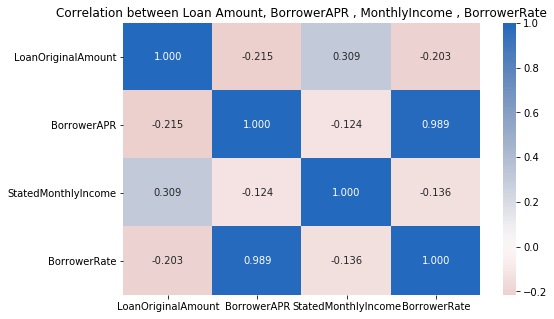

In [60]:
# ploting correlation of above list with heatmap
# https://kite.com/python/docs/matplotlib.pyplot.colormaps

# Making a list of columns to use in heatmap
data_heatmap = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','BorrowerRate']

plt.figure(figsize = [8, 5])
plt.title('Correlation between Loan Amount, BorrowerAPR , MonthlyIncome , BorrowerRate')

sns.heatmap(df_clean[data_heatmap].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);

 #### Plot Matrix for Numeric features

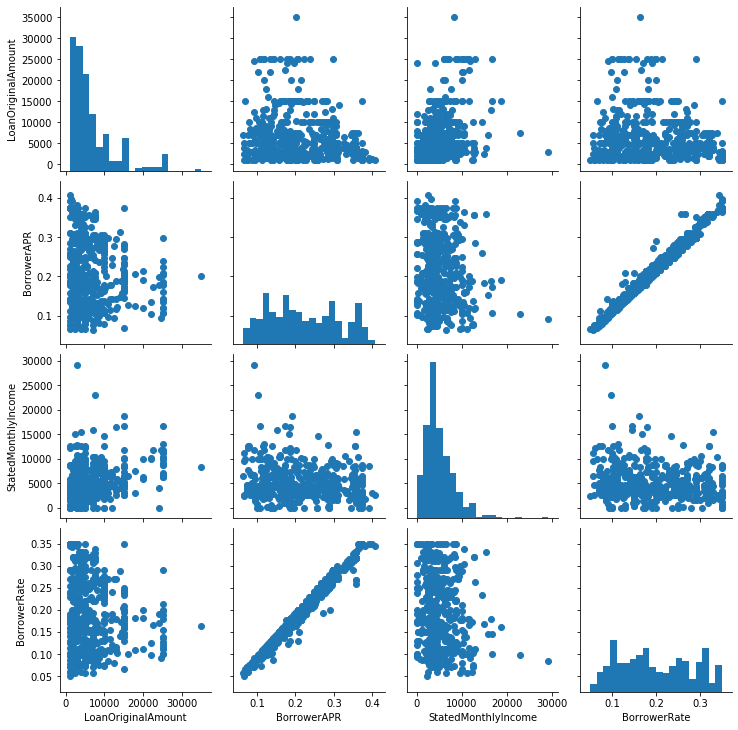

In [61]:
# plot matrix: sample 500 diamonds so that plots are clearer and render faster

# data_heatmap is my list of numeric features(columns) made in heatplot

df_clean_samp = df_clean.sample(500)

g = sns.PairGrid(data = df_clean_samp, vars = data_heatmap)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

 #### Box Plot for Numeric features agains Loan Status and Term

<Figure size 720x720 with 0 Axes>

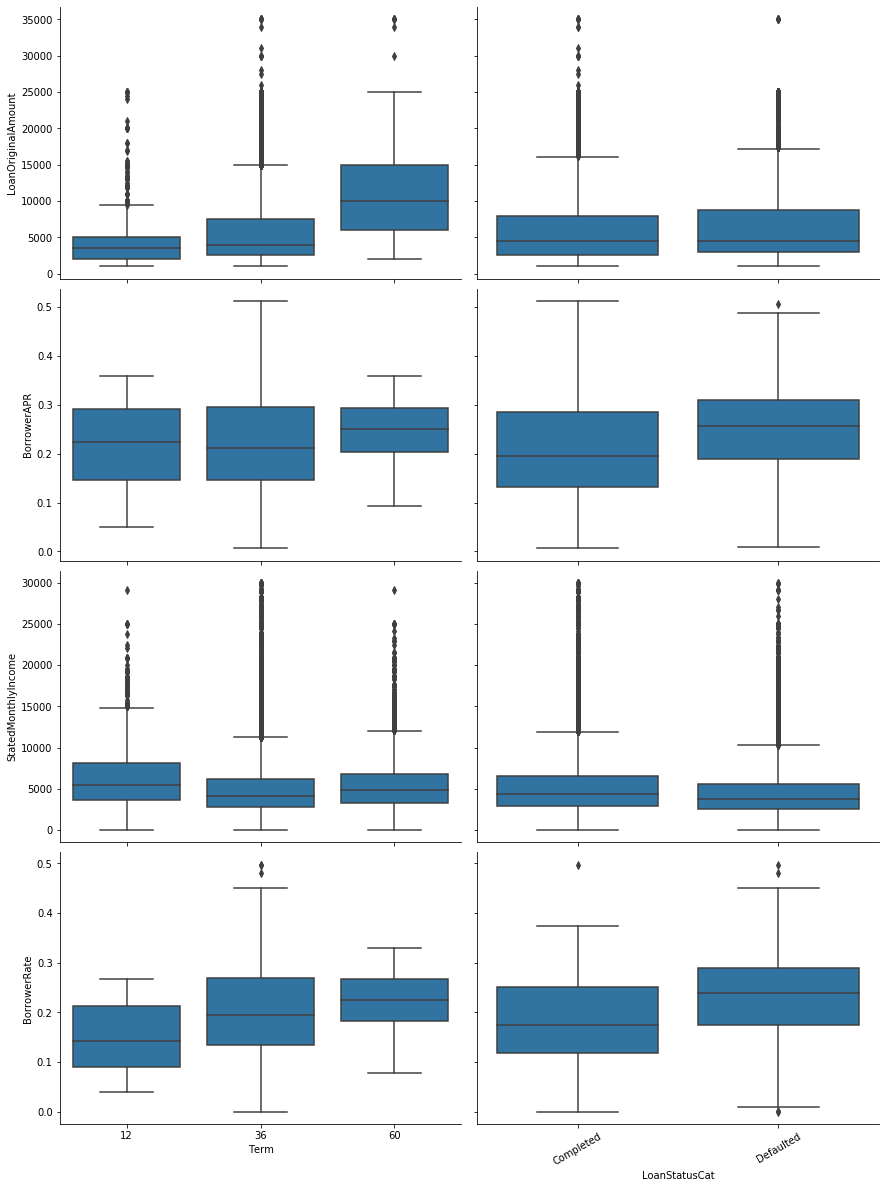

In [62]:
def box_func(x, y, **kwargs):
    """ Using this function to create box plots with sns PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = df_clean, y_vars = data_heatmap, 
                x_vars = ['Term','LoanStatusCat'], height = 4, aspect = 1.5)
g.map(box_func);
plt.xticks(rotation=30);

Loan Amount and BorrowerAPR has a weak negative correlation. It makes sense that when one increases other decreases.

I can see that BorrowerRate and BorrowerAPR have a very strong positive correlation.

Monthly Income and Loan Amount have a weak positive correlation. Peers with higher incomes borrow larger amounts is a big statement but there is a tendency we can say.

Monthly Income and BorrowerRate have a very weak negative correlation. Almost negligable.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I noticed that Loans borrowed for 60 months were defaulted more than half percent of time. Loans taken for 12 months have the highest ratio of pay back. 




### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Monthly Income and BorrowerRate have a negative correlation. Although it is a weak correlation but still it was interesting to note that the more you earn the less you pay in interest. It is pure business.

## Multivariate Exploration

Here I a creating plots of three or more variables to investigate this dataset even
further.

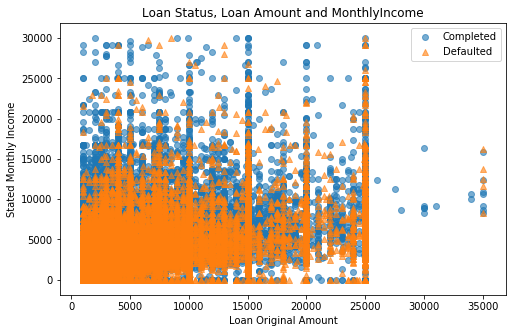

In [63]:
# Multivariate
# LoanStatus is category variable. with Amount on x-axis and StatedMonthlyIncome on y-axis
# https://matplotlib.org/api/markers_api.html

plt.figure(figsize = [8, 5])
plt.title("Loan Status, Loan Amount and MonthlyIncome")
plt.xlabel('Loan Original Amount')
plt.ylabel('Stated Monthly Income')

cat_markers = [['Completed', 'o'],
               ['Defaulted', '^']]

for cat, marker in cat_markers:
    df_cat = df_clean[df_clean['LoanStatusCat'] == cat]
    plt.scatter(data = df_cat, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', marker = marker, alpha=0.6)


plt.legend(['Completed','Defaulted']);


Looks like peers who borrowed more than 25000 and less than 35000 paidback most of the time and monthly income is a better indicator/preditor of being a defaulter or paying back the loan. Peers with higher monthly incomes have a higher rate of paying back the loans.

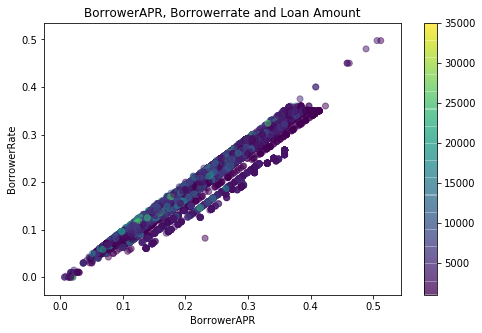

In [64]:
# Scatter plot for three numeric variables

plt.figure(figsize = [8, 5])
plt.title("BorrowerAPR, Borrowerrate and Loan Amount")
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')


plt.scatter(data = df_clean, x = 'BorrowerAPR', y = 'BorrowerRate', c = 'LoanOriginalAmount', alpha=0.5)
plt.colorbar();

I already found a strong positive correlation between borrowerAPR and borrower Rate  and now I extended my research to see the impact of the Amount borrowed. The multivariate exploration showed that the relationship between borrower APR and loan amount is positive and higher amonuts of loan almost invisible. 

#### Effect of LoanStatus on relationship of Amount and BorrowerRate

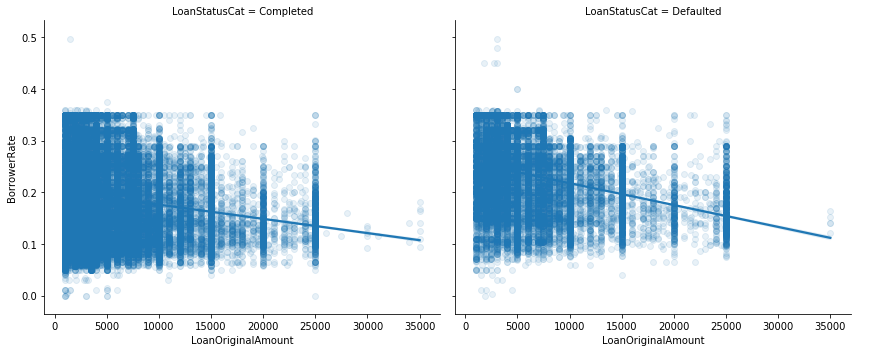

In [65]:
# Effect of LoanStatus with Amount on x-axis and BorrowerRate on y-axis
# Jitter adds some random noise to the data. This parameter will adjust the positions along the categorical axis.


g=sns.FacetGrid(data=df_clean, aspect=1.2, height=5, col='LoanStatusCat', col_wrap=2)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();


Relationship of loan rate and loan amount is not affected weather the loan is paidback or defaulted.Both have a weak negative correlation among them.

#### Effect of Term on relationship of Amount and BorrowerRate

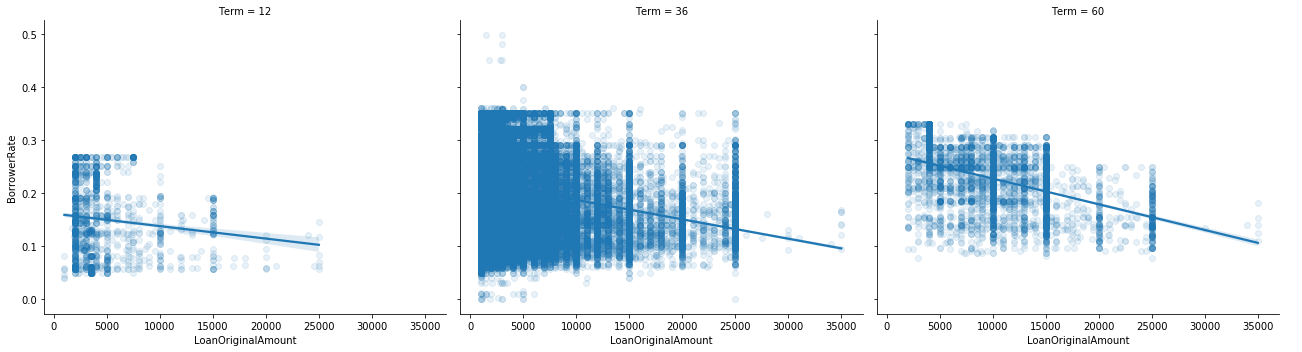

In [66]:
# Effect of Term with Amount on x-axis and BorrowerRate on y-axis
# Jitter adds some random noise to the data. This parameter will adjust the positions along the categorical axis.


g=sns.FacetGrid(data=df_clean, aspect=1.2, height=5, col='Term', col_wrap=3)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

It looks like Term doesn't have effect on relationship of Loan rate and LoanAmount

#### Effect of Employment Stattus on relationship of Amount and BorrowerRate

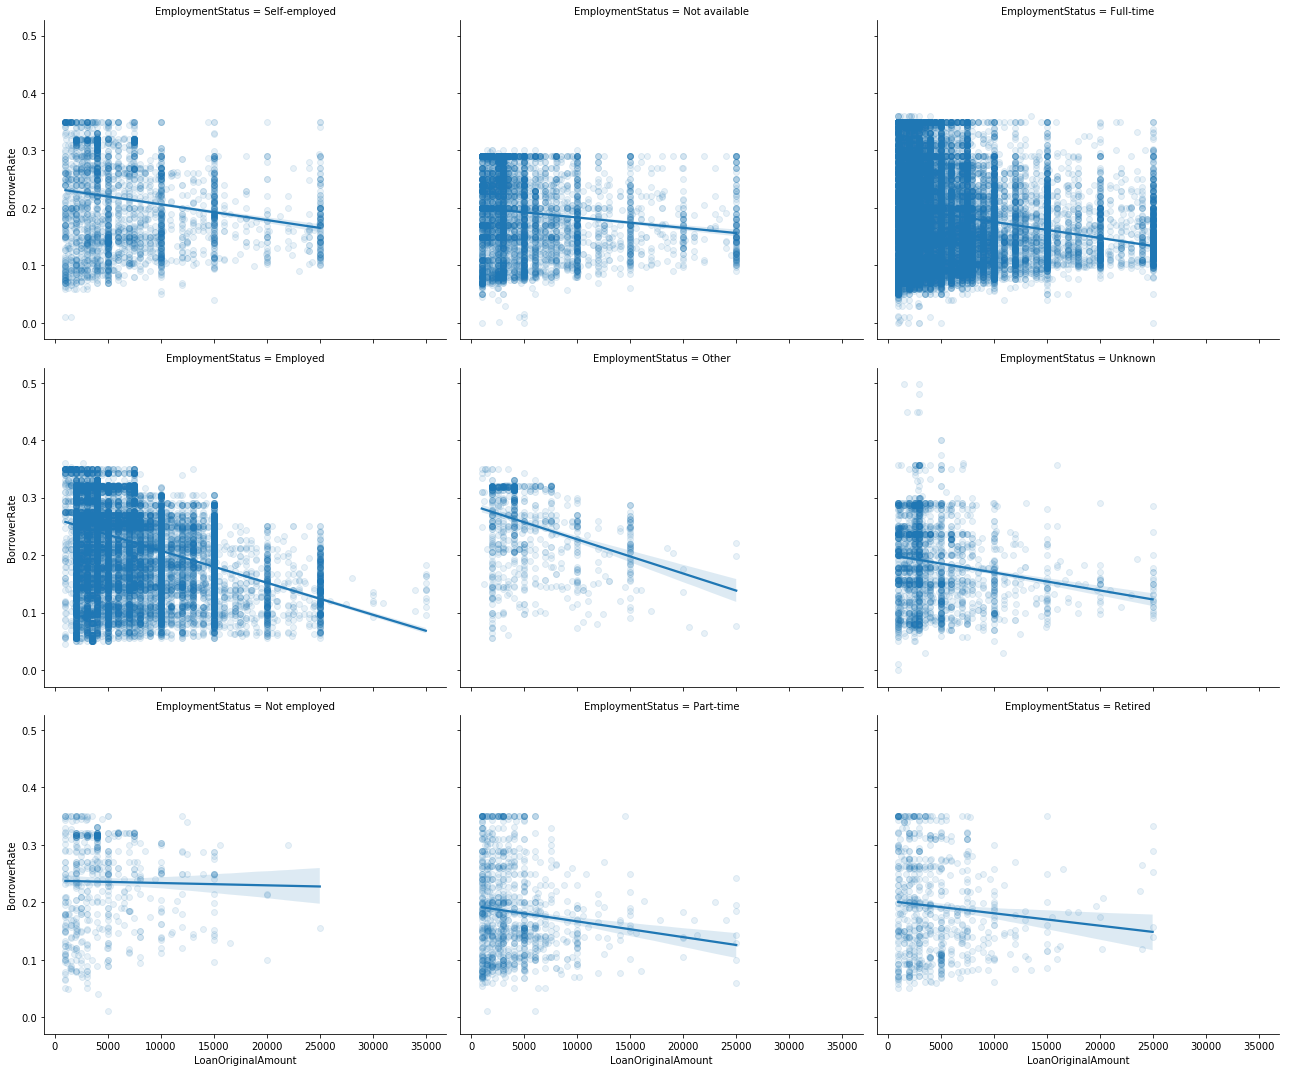

In [67]:
# Effect of EmploymentStatus with Amount on x-axis and BorrowerRate on y-axis
# Jitter adds some random noise to the data. This parameter will adjust the positions along the categorical axis.


g=sns.FacetGrid(data=df_clean, aspect=1.2, height=5, col='EmploymentStatus', col_wrap=3)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

Best fit line shows lot of fluctuation in effects with each employment status.When Employment status is not-employed and not available line is almost straight otherwise it shows negative correlation between Amount and Rate.

#### Rating and term effects on stated monthly income and loan original amount variables

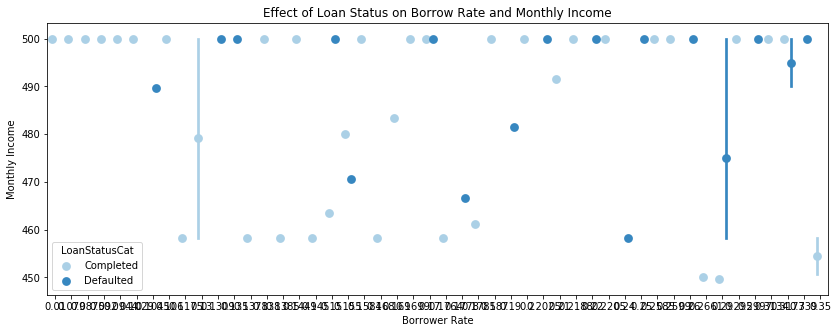

In [68]:
fig, ax = plt.subplots(ncols=1, figsize=[14,5])

# For Income between 450-500 dollars
df_new = df_clean.query('StatedMonthlyIncome > 449 &  StatedMonthlyIncome < 501 ')
plt.xticks(np.arange(0, max(df_clean.BorrowerRate), 1.0))
sns.pointplot(data = df_new, x = 'BorrowerRate', y = 'StatedMonthlyIncome', hue = 'LoanStatusCat', palette = 'Blues', linestyles = '', dodge = 0.4);
plt.title("Effect of Loan Status on Borrow Rate and Monthly Income")
plt.xlabel('Borrower Rate')
plt.ylabel('Monthly Income');

There is no good explanation for this plot but looks like lower borrow rate and lower monthly income has a better chance of Completed loans.

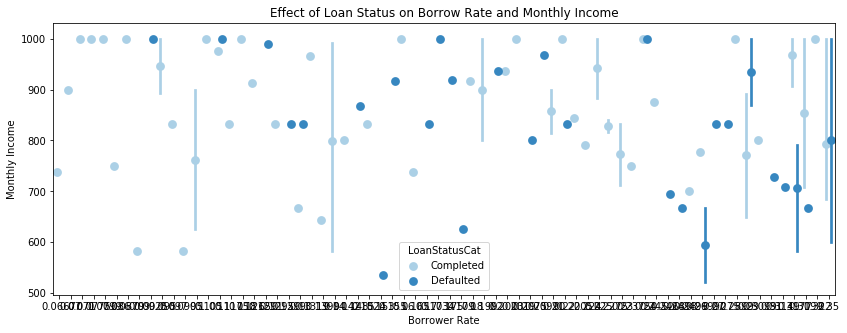

In [69]:
fig, ax = plt.subplots(ncols=1, figsize=[14,5])

# For Income between 450-500 dollars
df_new1 = df_clean.query('StatedMonthlyIncome > 500 &  StatedMonthlyIncome < 1001 ').sample(100)
plt.xticks(np.arange(0, max(df_clean.BorrowerRate), 1.0))
sns.pointplot(data = df_new1, x = 'BorrowerRate', y = 'StatedMonthlyIncome', hue = 'LoanStatusCat', palette = 'Blues', linestyles = '', dodge = 0.4);
plt.title("Effect of Loan Status on Borrow Rate and Monthly Income")
plt.xlabel('Borrower Rate')
plt.ylabel('Monthly Income');

With income in bracket of 500-1000, sample of 100 obseravtions, point plot does not give any clear information but it looks like peers with higher income and lower borrow Rate complete their loans. It didnt revealed any new information.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Looks like peers with large amounts of loans,low interest Rate  and working part time have a higher Tendency of completing their loans.It was interesting to find that Borrower Rate is not much affected by Employment status.

### Were there any interesting or surprising interactions between features?

It was surprising to see the relationship between Borrower Rate,monthly income and loan status for peers with income less than 500 dollars. I always thought that people with higher borrow Rate and having a larger monthly income must be better in paying their loans and but from this data set it looks like people with lowest monthly incomes(in this dataset only) are much better in completing their loan even with very low interest rates.